# Machine Learning: Multiple Linear Regression
## 1. Introduction
### 1.1 Definition

In statistics, linear regression is a linear approach to modeling the relationship between a dependent variable $y$ and one or more explanatory variables (or independent variables) $x_1, x_2, x_3, ... x_n$). When there is a single independent variable, the method is referred to as __simple linear regression__. When there are multiple independent variables, literature from statistics often refers to the method as __multiple linear regression__. In machine learning, this is part of supervised learning and the independent variables are called _features_ and the dependent variable is called _target_.

Different techniques can be used to prepare or train the linear regression equation from data, the most common of which is called __Ordinary Least Squares__ (OLS) because it minimizes the the squared distance of all datapoints from the regression line.

This notebook is about Multiple Linear Regression (MLR) with Scikit-Learn on random and real-world datasets. 

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://en.wikipedia.org/wiki/Linear_regression

### 1.2 Linear Model or Equation
The formula below is a linear equation that approximates the function of $x$ which best describes $y$. As such, both the $x$ and $y$ are continuous and numeric.

$y = f(x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + ... + \beta_n x_n +\epsilon$

The linear equation assigns one __coefficient__ to each dependent variable $x_1, x_2, x_3, ... x_n$, represented by the Greek letter beta: $\beta_1, \beta_2, \beta_3, ... \beta_n$. Each of coefficient describes the splope of the function _ceteris paribus_, i.e. 'all other things held fixed'. One additional coefficient is also added, giving the line an additional degree of freedom (e.g. moving up and down on a two-dimensional plot) and is often called the __intercept__ or $\beta_0$. $\epsilon$ in the model is called __error term__ or sometimes noise. This captures all other factors which influence the dependent variable other than $x$.

### 1.3 Assumptions of Linear Regression
- __Weak Exogeneity.__ This essentially means that the $x$ variables can be treated as fixed values, rather than random variables. The predictor variables are assumed to be error-free, i.e. not contaminated with measurement errors.
- __Linearity.__ This means that the variation of the $y$ variable is a linear combination of the parameters (regression coefficients) and the $x$ variables. 
- __Constant variance__ (a.k.a. _homoscedasticity_). This means that different values of the $y$ variable have the same variance in their errors, regardless of the values of the predictor variables. In practice this assumption is invalid (i.e. the errors are _heteroscedastic_) if the response variable can vary over a wide scale.
- __Independence of errors.__ This assumes that the errors are uncorrelated to the response variable and that the errors are random (i.e. not desribing another function).
- __Lack of multicollinearity__ among $x$ variables. This means a high correlation between $x$ variables will bias the coefficients of the model. This becomes important in MLR.

### 1.4 Interpreting Results
The coefficients produced by linear regression analysis can used to decribe to describe the relationship $x$ and $y$. $\beta_1$ is the expected change in $y$ for a one-unit change in $x_1$ all other coefficients held fixed (ceteris paribus). $\beta_2$ is the expected change in $y$ for a one-unit change in $x_2$ all ceteris paribus. And so on and so forth. When all $x$ variables equal zero units, then $y$ is at least expected to be $\beta_0$. An unknown case (where $x_1, x_2, x_3, ... x_n$ are given and $y$ unknown) can now be plugged into the equation and be solved for the expected value $\hat{y}$. This is multiple linear regression used in prediction.

An easy example would be the meter of a cab fare. We assume a positive linear relation between the fare ($y$), the distance travelled ($x_1$), and the time travelled ($x_2$). Upon entering the cab, the meter is already set to a fixed starting price at zero kilometers travelled e.g. 4€, which would be $\beta_0$. For each additional kilometer travelled, the meter goes up by e.g. 2.00€, which would be $\beta_1$. Moreover, when the cap is held at a traffic light or in a traffic jam, the meter still goes up after a certain amount of e.g. 1.00€, which would be $\beta_2$.

### 1.5 Evaluation
The are several evaluation metrics for model accuracy as well as for the importance of each single feature. MLR model performance evaluation commonly uses the following 4 metrics.
- The __coefficient of determination__, also known as goodness-of-fit, is denoted $R^2$ or $r^2$ and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable or explained from the independent variable(s). The R-squared usually ranges between 0-1 and in case of a Simple Linear Regression, can be read as a percentage.
   - $R^2 = \frac{\frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\frac{1}{n}\sum_{i=1}^n(\bar{y}_i - \hat{y}_i)^2}$
- The __Mean Absolute Error__ (MAE) is the easiest metric to understand, since it is the "average error".
   - $MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$
- The __Mean Squared Error__ (MSE) is similar to MAE but geared towards highlighting large errors. The squaring exponentially increases large errors in comparison to small ones.
   - $MSE = \frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2$
- The __Root Mean Squared Error__ (RMSE) is the most popular error metric because it is interpretable in the same units as the dependent variable $y$.
   -  $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2}$

The are also two different ways to determine the importance of each feature in predicting the outcome.
- The classic statistical approach is to reject the _Null Hypothesis_ by computing the __p-values__ from the _t-values_ and _standard errors_ of each coefficient.  Machine learning this is somethimes called __feature importance scoring__ to determine which features are important to the model and which are redundant. The prediciton of a model is made by the weighted sum of all input values.
   - A small p-value ≤ 0.05 indicates strong evidence against the null hypothesis, meaning a feature or its coefficient is statistically signficant.
   - A large p-value > 0.05 indicates weak evidence against the null hypothesis, meaning a feature or its coefficient is statistically signficant.

## 2. Multiple Linear Regression on Random Data
### 2.1 Generating a Random Dataset

In order to showcase multiple linear regression, a random dataset will be generated with Scikit-Learn. This regression dataset generator will require the following inputs:
- n_samples: the number of samples or observations in the feature set and target
   - value will be 500
- n_features: the number of features or x-variables
   - since this is for MLR, value will be 5
- n_informative: the number of features that are important/signficant
   - value will be 3
- noise: the amount of noise without which the data will be perfectly linear
   - value will be 5
- random_state: this will set a seed for the random generation of data, which can be used to reproduce the same results elsewhere
   - value will be 1

The outputs of this random data generation will be:
- X: array of shape [n_samples, n_features] a.k.a. Feature Matrix or Independent Variable
- y: array of shape [n_samples] a.k.a. Target or Dependent Variable

In [1]:
# generate random regression dataset
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=500, n_features=5, n_informative=3, noise=5, random_state=1)
print(X.shape, y.shape)

(500, 5) (500,)


### 2.2 Visualizing the Random Dataset

Obviously, a five-dimensional feature set cannot be visualized all at once. Plotting each individual feature against the target on a two-dimensional space should already hint at a linear relationship, at least for some pairings while others are redundant. However, a linear relationship will not be perfectly salient, as MLR is about the joint features not the individual for predicting $y$.

In [2]:
# visualize the random regression dataset
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

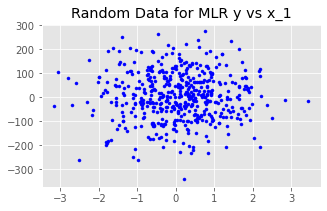

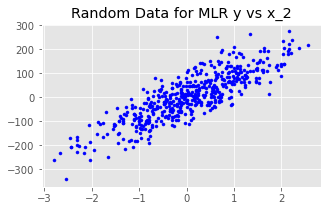

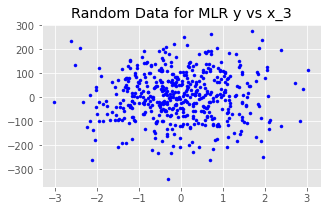

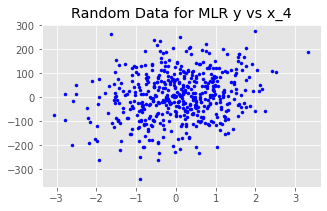

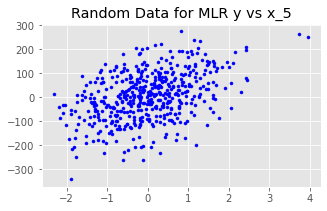

In [3]:
# plot all individual features against the target
for f in range (0,5):
    plt.figure(figsize=(5,3))
    plt.scatter(X[:,f],y, marker='.', color='b')
    plt.title('Random Data for MLR y vs x_' + str(f+1))

<AxesSubplot:>

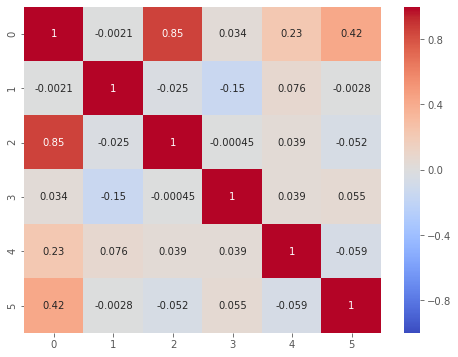

In [4]:
# obtain a correlation heatmap
import seaborn as sns
import numpy as np
plt.figure(figsize=(8,6))
sns.heatmap(np.corrcoef(y,X,rowvar=False), annot = True, vmin=-1, vmax=1, cmap= 'coolwarm')
# np.corrcoef --> reads rows & columns transposed --> set rowvar=False to read as rows as rows & columns as columns 

In the correlation matrix $y$ is labelled as 0 and all features of $x$ from 1-5. This suggests that the definitely 2nd but perhaps also the 4th and 5th $x$-feature will be significant/important in predicting $y$.

### 2.3 Modelling MLR

If in simple linear regression, a one-dimensional object (a.k.a. a line) is fitted onto two-dimensional data, then, in MLR, an a hyperplane is fitted onto multidimensional data. The MLR-fitted plane is always one dimensional lower than the dimension of the data.
Like SLR, the MLR plane is fitted on the data that describes the relationship between all $x_1, x_2, x_3, ... x_n$ variables and $y$ by minimizing the squared distances between the individual datapoints and the plane itself. The distances between the actual $y_i$ and $\hat{y}_i$ is the error of the model.

In [5]:
# build a simple linear regression model
from sklearn.linear_model import LinearRegression

MLR = LinearRegression()
MLR.fit(X,y)
b_0 = MLR.intercept_
b_1 = MLR.coef_

# obtain coefficients
print ('Intercept: %.2f' % b_0)
print ('Coefficient_1: %.2f' % b_1[0])
print ('Coefficient_2: %.2f' % b_1[1])
print ('Coefficient_3: %.2f' % b_1[2])
print ('Coefficient_4: %.2f' % b_1[3])
print ('Coefficient_5: %.2f' % b_1[4])

Intercept: 0.02
Coefficient_1: 0.43
Coefficient_2: 87.09
Coefficient_3: -0.05
Coefficient_4: 21.84
Coefficient_5: 49.83


### 2.4 Evaluating the MLR model
The $R^2$, $MAE$, $MSE$, und $RMSE$ will be used to evaluate the model.

In [6]:
#evaluation
import numpy as np
# obtain predictions
y_hat = MLR.predict(X)

print("R-squared: %.4f" %MLR.score(X,y))
print("Mean Absolute Error (MAE): %.4f" % np.mean(np.absolute(y - y_hat)))
print("Mean Squared Error (MSE): %.4f" % np.mean((y- y_hat) ** 2))
print("Root Mean Squared Error (RMSE): %.4f" % np.sqrt(np.mean((y - y_hat) ** 2)))

R-squared: 0.9975
Mean Absolute Error (MAE): 4.0949
Mean Squared Error (MSE): 25.3439
Root Mean Squared Error (RMSE): 5.0343


### 2.5 Evaluating Feature Importance or Coefficient Significance
This notebook uses statistical significance testing to determine the importance of coefficients/features. Although statistical significance testing is not included in Scikit-Learn's linear model, the standard error, t-values and p-values can be calculated from the MSE. As three features were pre-selected to be informative during data generation, it can be expected to find three significant/important features.

In [7]:
# obtain standard error (SE), t values and p values for significance
import pandas as pd
from scipy import stats
params = np.append(MLR.intercept_, MLR.coef_)

newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-y_hat)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1 - stats.t.cdf(np.abs(i), (len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values, 3)
sign = p_values <= 0.05
params = np.round(params,4)

# print all values like standard statistics software would
df1 = pd.DataFrame()
df1["Coefficients"], df1["SE"], df1["t values"], df1["p values"], df1["significant"] = [params, sd_b, ts_b, p_values, sign]
df1

,Coefficients,SE,t values,p values,significant
0,0.0241,0.227,0.106,0.915,False
1,0.4261,0.225,1.891,0.059,False
2,87.0886,0.227,383.635,0.000,True
3,-0.0506,0.225,-0.225,0.822,False
4,21.8390,0.227,96.214,0.000,True
5,49.8299,0.234,212.544,0.000,True


The statistical significance testing has found that the 2nd, 4th, and 5th feature's coefficient are significant for the model in predicting $y$.

Feature: 1, Score: 0.43
Feature: 2, Score: 87.09
Feature: 3, Score: -0.05
Feature: 4, Score: 21.84
Feature: 5, Score: 49.83


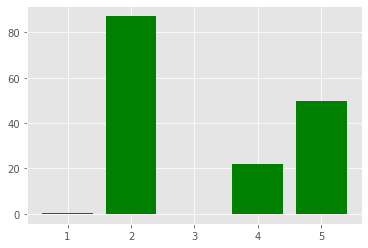

In [8]:
# visualize the coefficients of the features
importance = MLR.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.2f' % (i+1,v))
    
# plot feature importance
plt.bar([f+1 for f in range(len(importance))], importance, color='g')
plt.show()

This methods can also be used for feature selection and model refinement (as shown below).

## 3. Multiple Linear Regression on Real-World Data
### 3.1 The Goal and the Dataset

As most researched and most applied tool of statistics and econometrics, regression analysis has been used in countless applications and case studies. As it predicts a continuous, numerical value for objects with one or more features, its most common business application is price prediction. However, this notebook will employ MLR analysis to find which three feature best predicts the carbon emissions for cars in Canada. To do so, it uses the dataset called "FuelConsumption.csv" collected by the Canadian government provides data on model-specific fuel consumption ratings and estimated CO2 emissions for new light-duty vehicles for retail. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

| Feature Name | Meaning |
|--------------|---------|
| MODELYEAR | year in which vehicle was released onto Canadian market |
| MAKE | company producing the vehicle |
| MODEL | model of the vehicle |
| VEHICLECLASS | type of vehicle |
| ENGINESIZE | engine size in L |
| CYLINDERDS | number of cylinders |
| TRANSMISSION | type of transmission and number of gears |
| FUELCONSUMPTION_CITY | fuel consumption in city in L/100km |
| FUELCONSUMPTION_HWY | fuel consumption on highway in L/100km |
| FUELCONSUMPTION_COMB | fuel consumption city & highway combined average in L/100km |
| FUELCONSUMPTION_COMB_MPG | fuel consumption city & highway combined average in MPG |
| CO2EMISSIONS | CO2 emissions in g/km |

In [9]:
# download the dataset from IBM cloud storage
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
print("Download complete.")

Download complete.


In [10]:
# read dataset into pandas dataframe
import pandas as pd
df = pd.read_csv("FuelConsumption.csv")
print(df.shape)
df.head()

(1067, 13)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### 3.2 Exploratory Data Analysis (EDA)
EDA are the processes of gaining preliminary insights on a dataset before data mining. Summary statistics and visualization are common tools of EDA to observe the distributions and other characteristics of features in a dataset.

<AxesSubplot:>

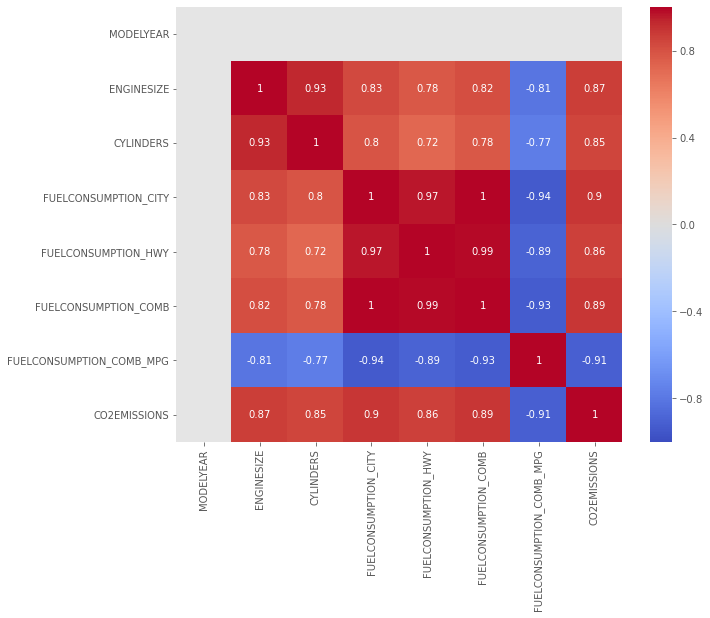

In [11]:
# obtain a correlation heatmap
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, cmap= 'coolwarm')

All continuous features have a high correlation with the target. Moreover, this notebook will focus on engine size, cylinders, and the 3 fuel consumption (city, highway, & combined) as potential predictors for CO2 emission. In MLR, these five features can be used together, but using several fuel consumption features may expected to be redundant.

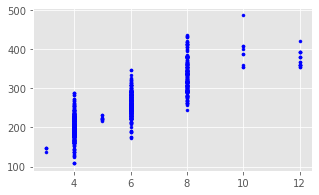

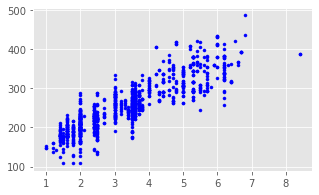

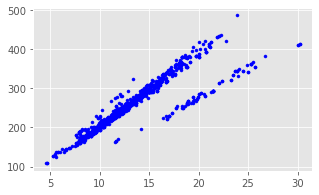

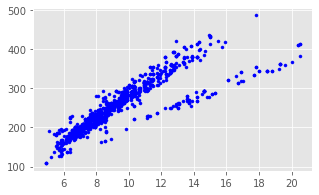

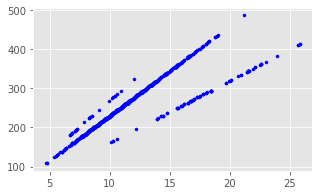

In [12]:
# plot all individual features against the target
feature_list = [df.CYLINDERS,df.ENGINESIZE,df.FUELCONSUMPTION_CITY,df.FUELCONSUMPTION_HWY,df.FUELCONSUMPTION_COMB]
for f in feature_list:
    plt.figure(figsize=(5,3))
    plt.scatter(f, df.CO2EMISSIONS, marker='.', color='b')

### 3.3 Modelling MLR

In [13]:
# modelling for X=cylinders, engine size, 3 fuel-cons. and y=C02
MLR = LinearRegression()
X = df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']].values
y = df[['CO2EMISSIONS']].values
MLR.fit(X, y)

y_hat = MLR.predict(X)
b_0 = MLR.intercept_
b_1 = MLR.coef_

print ('Intercept: %.4f' % b_0)
print ('Coefficient_1: %.4f' % b_1[0,0])
print ('Coefficient_2: %.4f' % b_1[0,1])
print ('Coefficient_3: %.4f' % b_1[0,2])
print ('Coefficient_4: %.4f' % b_1[0,3])
print ('Coefficient_5: %.4f' % b_1[0,4])

Intercept: 66.1478
Coefficient_1: 7.2014
Coefficient_2: 10.9182
Coefficient_3: -6.6906
Coefficient_4: -7.2416
Coefficient_5: 23.2615


In [14]:
# interpreting the results
print ('For the most basic car with \'zero features\', there is an expected CO2 emission of %.0f' %b_0, 'g/km.')
print ('For each additional cylinder in the engine, the CO2 emission is expected to increase by %.0f' %b_1[0,0], 'g/km.')
print ('For each additional liter of engize size, the CO2 emission is expected to increase by %.0f' %b_1[0,1], 'g/km.')
print ('For each additional liter of fuel consumed per 100km in the city, the CO2 emission is expected to decrease by %.0f' %b_1[0,2], 'g/km.')
print ('For each additional liter of fuel consumed per 100km on the highway, the CO2 emission is expected to decrease by %.0f' %b_1[0,3], 'g/km.')
print ('For each additional liter of fuel consumed per 100km in the combined average, the CO2 emission is expected to increase by %.0f' %b_1[0,4], 'g/km.')

For the most basic car with 'zero features', there is an expected CO2 emission of 66 g/km.
For each additional cylinder in the engine, the CO2 emission is expected to increase by 7 g/km.
For each additional liter of engize size, the CO2 emission is expected to increase by 11 g/km.
For each additional liter of fuel consumed per 100km in the city, the CO2 emission is expected to decrease by -7 g/km.
For each additional liter of fuel consumed per 100km on the highway, the CO2 emission is expected to decrease by -7 g/km.
For each additional liter of fuel consumed per 100km in the combined average, the CO2 emission is expected to increase by 23 g/km.


But are all these results i.e. coefficients statistically significant?

### 3.4 MLR Model and Feature Evaluation

In [15]:
# print model evaluation metrics
print("R-squared: %.4f" %MLR.score(X,y))
print("Mean Absolute Error (MAE): %.4f" % np.mean(np.absolute(y - y_hat)))
print("Mean Squared Error (MSE): %.4f" % np.mean((y- y_hat) ** 2))
print("Root Mean Squared Error (RMSE): %.4f" % np.sqrt(np.mean((y - y_hat) ** 2)))

R-squared: 0.8642
Mean Absolute Error (MAE): 16.8984
Mean Squared Error (MSE): 544.9679
Root Mean Squared Error (RMSE): 23.3445


In [16]:
# obtain standard error (SE), t values and p values for significance
import pandas as pd
from scipy import stats
params = np.append(MLR.intercept_, MLR.coef_)

newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-y_hat)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1 - stats.t.cdf(np.abs(i), (len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values, 3)
sign = p_values <= 0.05
params = np.round(params,4)

# print all values like standard statistics software would
df1 = pd.DataFrame()
df1["Coefficients"], df1["SE"], df1["t values"], df1["p values"], df1["significant"] = [params, sd_b, ts_b, p_values, sign]
df1

,Coefficients,SE,t values,p values,significant
0,66.1478,3.320,19.926,0.000,True
1,7.2014,1.158,6.218,0.000,True
2,10.9182,1.561,6.994,0.000,True
3,-6.6906,13.770,-0.486,0.627,False
4,-7.2416,11.350,-0.638,0.524,False
5,23.2615,25.037,0.929,0.353,False


This reveals that the coefficients on all fuel consumptions features were insignificant. It also seemed counter-intuitive that increased fuel consumption would decrease CO2 emissions.

### 3.5 Model Refinement
While engine-size and cylinders are signficant features, all three fuel consumption features together are insignificant. Let's refine the model by only using cylinders, engize-size, and fuel consumption combined. 

In [18]:
# model refine for X=cylinders, engine size, fuel-cons. combined and y=C02
MLR = LinearRegression()
X = df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB']].values
y = df[['CO2EMISSIONS']].values
MLR.fit(X, y)

y_hat = MLR.predict(X)
b_0 = MLR.intercept_
b_1 = MLR.coef_

print ('Intercept: %.4f' % b_0)
print ('Coefficient_1: %.4f' % b_1[0,0])
print ('Coefficient_2: %.4f' % b_1[0,1])
print ('Coefficient_3: %.4f' % b_1[0,2])

Intercept: 65.2233
Coefficient_1: 7.5162
Coefficient_2: 10.8552
Coefficient_3: 9.5956


In [19]:
# print model evaluation metrics
print("R-squared: %.4f" %MLR.score(X,y))
print("Mean Absolute Error (MAE): %.4f" % np.mean(np.absolute(y - y_hat)))
print("Mean Squared Error (MSE): %.4f" % np.mean((y- y_hat) ** 2))
print("Root Mean Squared Error (RMSE): %.4f" % np.sqrt(np.mean((y - y_hat) ** 2)))

R-squared: 0.8640
Mean Absolute Error (MAE): 16.9153
Mean Squared Error (MSE): 545.6836
Root Mean Squared Error (RMSE): 23.3599


In [20]:
# feature significance testing
params = np.append(MLR.intercept_, MLR.coef_)

newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-y_hat)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1 - stats.t.cdf(np.abs(i), (len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values, 3)
sign = p_values <= 0.05
params = np.round(params,4)

# print all values like standard statistics software would
df1 = pd.DataFrame()
df1["Coefficients"], df1["SE"], df1["t values"], df1["p values"], df1["significant"] = [params, sd_b, ts_b, p_values, sign]
df1

,Coefficients,SE,t values,p values,significant
0,65.2233,3.190,20.447,0.0,True
1,7.5162,1.118,6.723,0.0,True
2,10.8552,1.560,6.960,0.0,True
3,9.5956,0.359,26.700,0.0,True


Now all coefficients are significant.

In [21]:
# interpreting the new, significant results
print ('For the most basic car with \'zero features\', there is an expected CO2 emission of %.0f' %b_0, 'g/km.')
print ('For each additional cylinder in the engine, the CO2 emission is expected to increase by %.0f' %b_1[0,0], 'g/km.')
print ('For each additional liter of engize size, the CO2 emission is expected to increase by %.0f' %b_1[0,1], 'g/km.')
print ('For each additional liter of fuel consumed per 100km (city/highway combined average), the CO2 emission is expected to increase by %.0f' %b_1[0,2], 'g/km.')

For the most basic car with 'zero features', there is an expected CO2 emission of 65 g/km.
For each additional cylinder in the engine, the CO2 emission is expected to increase by 8 g/km.
For each additional liter of engize size, the CO2 emission is expected to increase by 11 g/km.
For each additional liter of fuel consumed per 100km (city/highway combined average), the CO2 emission is expected to increase by 10 g/km.
